<a href="https://colab.research.google.com/github/abigailhtp/Blaze-Praktikum-ML/blob/main/tugas_praktikum_ke_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Miriam Stefani Abigail Hutapea <br>
NIM: 24060122130051 <br>
Tugas Praktikum ke-2 C1

In [68]:
%matplotlib inline
from copy import deepcopy
import pandas
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

*Import dataset iris*

In [69]:
#memuat dataset
url= "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal-length','sepal-width','petal-length','petal-width','class']
dataset=pandas.read_csv(url,names=names)

><h6>dataset iris disimpan pada variabel dataset</h6>

<h4><b>1. Lakukanlah clustering menggunakan dataset iris menggunakan fitur 2 dan 3</b></h4>

In [70]:
print(dataset.head(5))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


> dari dataset ini diketahui fitur 2 dan 3 yaitu sepal width dan petal length. Maka clustering dataset iris yang akan dilakukan  berdasarkan <b>sepal-width dan petal-length</b>

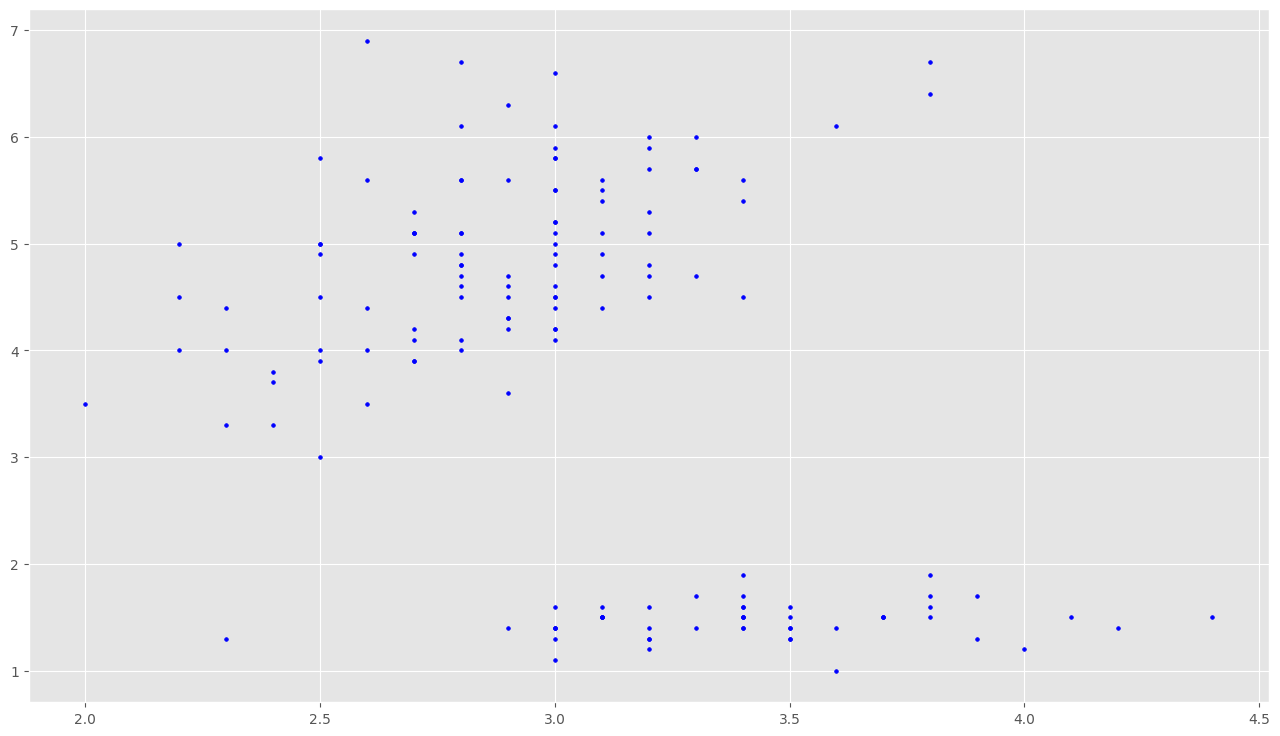

In [71]:
# plot dataset
f2= dataset['sepal-width'].values
f3=dataset['petal-length'].values
X=np.array(list(zip(f2,f3)))
plt.scatter(f2,f3, c='blue',s=7)

> gambar diatas merupakan plotting data sepal-width dan petal-length. Untuk melakukan visualisasi digunakan fungsi *plt.scatter(f2,f3, c='blue',s=7)* . Selanjutnya dilakukan <b>clustering</b> terhadap fitur 2 dan 3 <br>

>X digunakan untuk menggabungkan dua array atau list (dalam hal ini f2 dan f3) menjadi array dan dimensi

In [72]:
#Melakukan clustering dengan menggunakan K-Means Clustering
# Menentukan jumlah cluster
kmeans= KMeans(n_clusters=3)
#Fitting input data
kmeans=kmeans.fit(X)
#Mendapatkan cluster labels
labels=kmeans.predict(X)

#Mendapatkan nilai centroid
C=kmeans.cluster_centers_

#Mencetak nilai centroid
print(C)

[[2.75396825 4.4       ]
 [3.418      1.464     ]
 [3.07297297 5.76756757]]


> Untuk melakukan KMeans Clustering dilakukan inisiasi jumlah cluster yang ingin dibuat. Pada percobaan ini inisiasi jumlah cluster yang ingin dibuat yaitu 3. variabel labels digunakan untuk memprediksi cluster dari setiap data dalam dataset<br>

>Kemudian untuk mencari nilai centroid dari setiap cluster, digunakan fungsi *kmeans.cluster_centers_*

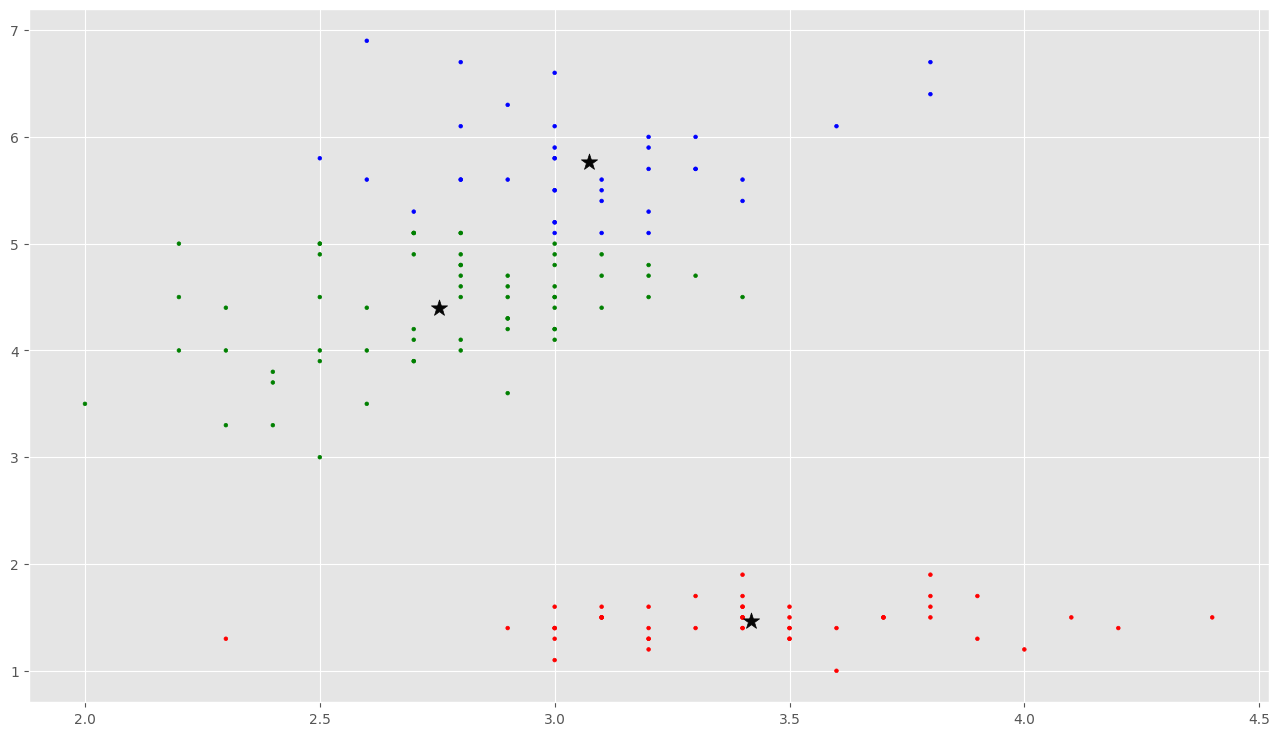

In [73]:
#plot hasil clustering
colors=['green','red','blue']
plt.scatter(X[:,0],X[:,1],s=7,c=[colors[label]for label in labels])
plt.scatter(C[:,0],C[:,1], marker='*',s=150,c='#050505')

> berikut merupakan hasil plotting cluster beserta centroid nya yang ditandai dengan menggunakan tanda bintang

 <h3>Melakukan Clustering menggunakan generate dataset</h3>

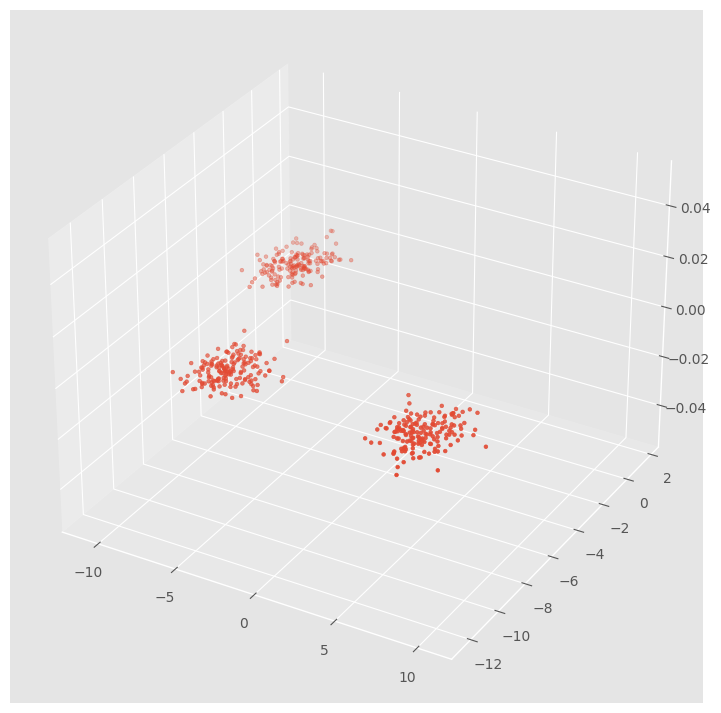

In [74]:
#Import library yang belum diimport
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize']=(16,9)

#Men-generate dataset yang terkelompok ke dalam 3 cluster
X,y=make_blobs(n_samples=500,n_features=2, centers=3)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],s=7)

> Dilakukan generate dataset sebanyak 500 samples yang dikelompokkan berdasarkan fitur 2 dan 3 dan terkelompok sebanyak 3 cluster dengan menggunakan *make_blobs*. Kemudian dilakukan visualisasi persebaran cluster data dengan menggunakan 3d.

>Setelah itu dilakukan clustering seperti sebelumnya

In [75]:
# Menentukan jumlah cluster
kmeans= KMeans(n_clusters=3)
#Fitting input data
kmeans=kmeans.fit(X)
#Mendapatkan cluster labels
labels=kmeans.predict(X)

#Mendapatkan nilai centroid
C=kmeans.cluster_centers_

#Mencetak nilai centroid
print(C)

[[ 6.92908448 -9.51691295]
 [-5.32018395 -9.22395966]
 [-8.35297527 -1.32675802]]


> kemudian dilakukan plot hasil clustering

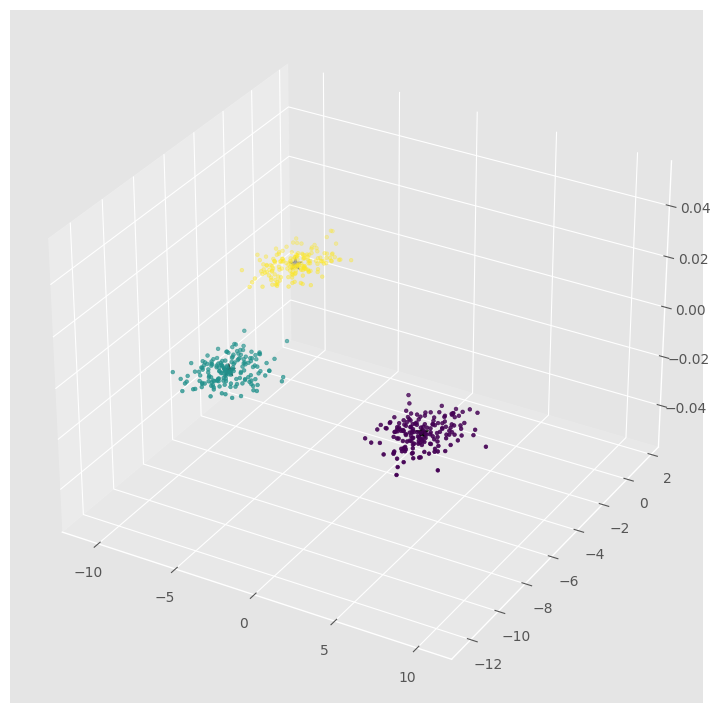

In [76]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],c=y,cmap='viridis',s=7)
ax.scatter(C[:,0],C[:,1],marker='*',c='#050505',s=100)

> berikut merupakan hasil clustering sebanyak 3 cluster beserta centroidnya yang ditandai dengan tanda bintang.

<h4><b>2. Lakukanlah evaluasi hasil clustering menggunakan inertia (SSE) dan silhouette coefficient </b></h4>

<h3>a. Menggunakan Inertia (SSE)</h3>

In [78]:
for k in range (1,11):
  #Menentukan jumlah cluster
  kmeans=KMeans(n_clusters=k,random_state=1)
  #Fitting input data
  kmeans=kmeans.fit(X)
  #Mendapatkan cluster labels
  labels=kmeans.predict(X)
  #Menghitung jumlahan jarak antara setiap sample dengan cluster centroid (SSE)
  inertia=kmeans.inertia_
  print("k:",k," cost:", inertia)
print("")

k: 1  cost: 29995.567926311054
k: 2  cost: 6943.864151589908
k: 3  cost: 986.2467734917867
k: 4  cost: 876.419425238381
k: 5  cost: 758.2898453586969
k: 6  cost: 687.1867464641444
k: 7  cost: 559.2203209686128
k: 8  cost: 478.33974332004317
k: 9  cost: 417.673181664854
k: 10  cost: 385.8062098599561



> Cluster yang bagus memiliki inertia yang rendah, yang berarti titik data lebih dekat dengan centroid cluster. Jika nilai k 1-10, maka dapat disimpulkan k=10 merupakan cluster yang bagus karena memiliki inertia yang rendah.

<h3>b. Menggunakan Silhouette Coefficient</h3>

In [79]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X,labels)

0.35713172714455593

> Silhoette score digunakan untuk mengevaluasi kualitas clustering dengan memperhitungkan seberapa titik data dalam cluster yang sama. Nilai silhouette score berada di antara -1 dan 1. Karena hasil dari silhouette score jika jumlah clustering=3 adalah 0.35, berarti titik data mendekati nilai 0 yang berarti titik data berada di antara 2 cluster.

<h4><b>3. Tentukan juga jumlah K dengan elbow method</b></h4>

*Import library untuk elbow method*

In [80]:
#Importing library
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
from sklearn.cluster import KMeans

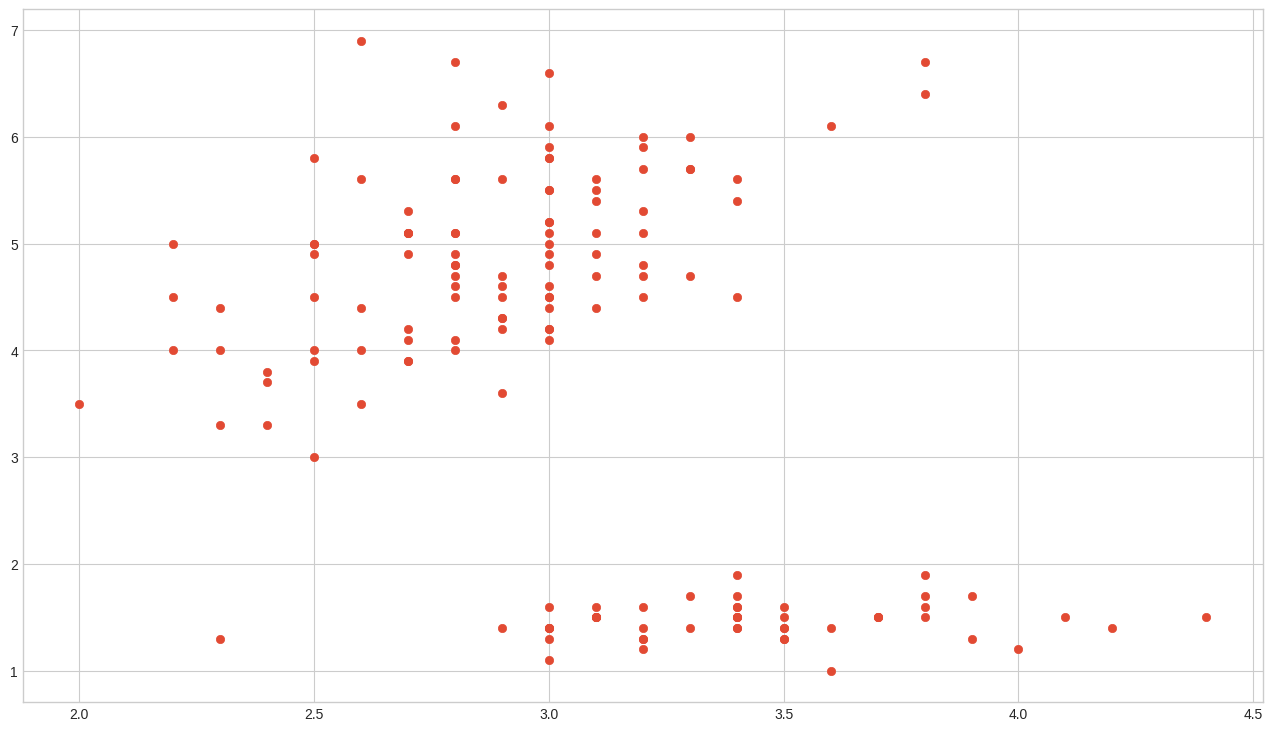

In [82]:
# plot dataset
f2= dataset['sepal-width'].values
f3=dataset['petal-length'].values
plt.scatter(f2,f3)
plt.show()

> berikut merupakan visualisasi titik data iris menggunakan 2 fitur, yaitu sepal width dan petal-length

> Untuk menentukan nilai yang tepat untuk K, dapat digitung dengan menggunakan SSE

In [89]:
X=np.array(list(zip(f2,f3))).reshape(len(f3),2)
SSE=[]
K=range(1,11)
for k in K:
  kmeanModel=KMeans(n_clusters=k).fit(X)
  kmeanModel.fit(X)
  SSE.append(kmeanModel.inertia_)

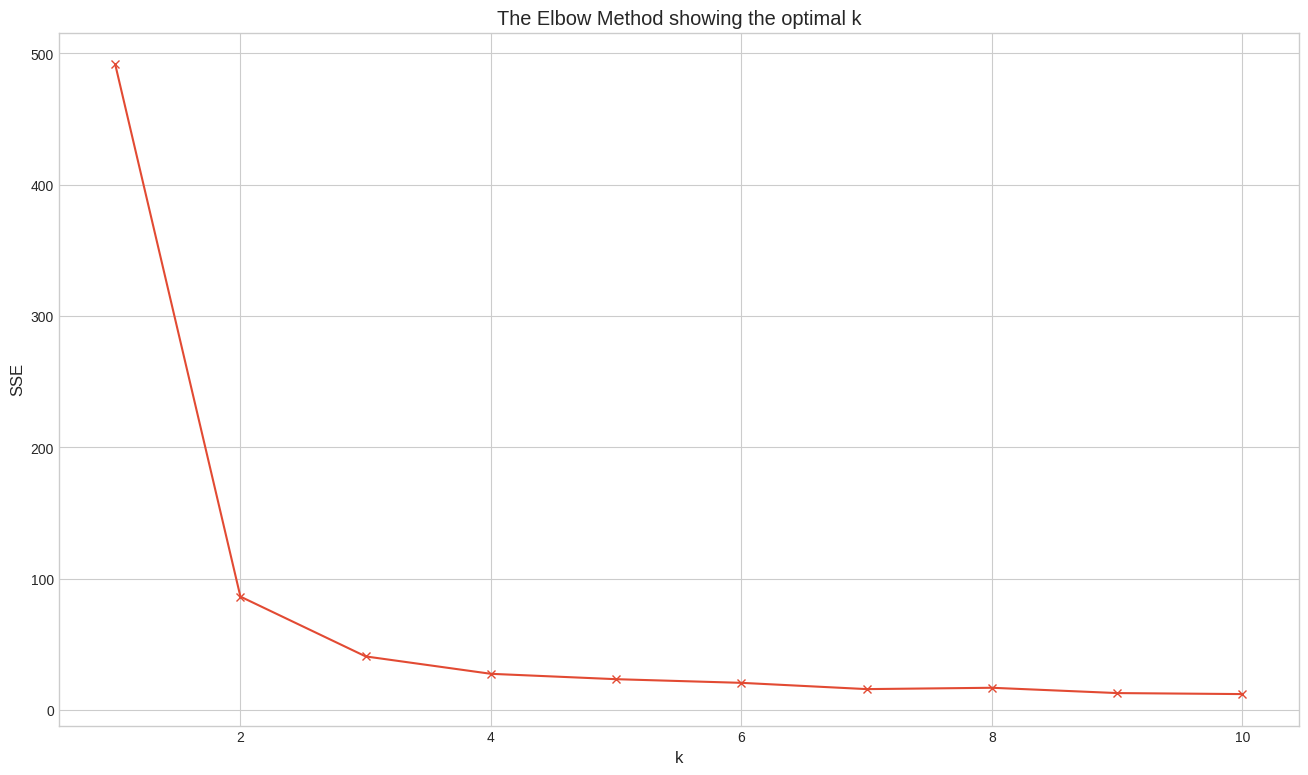

In [90]:
#plot the elbow
plt.plot(K,SSE,'x-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

> Dari grafik, nilai k terbaik  adalah jumlah cluster dimana penurunan inertia mulai melambat, yang terjadi di k=4

<h4><b>4. Plot hasil cluster dengan nilai K yang anda pilih dengan scatterplot</b></h4>

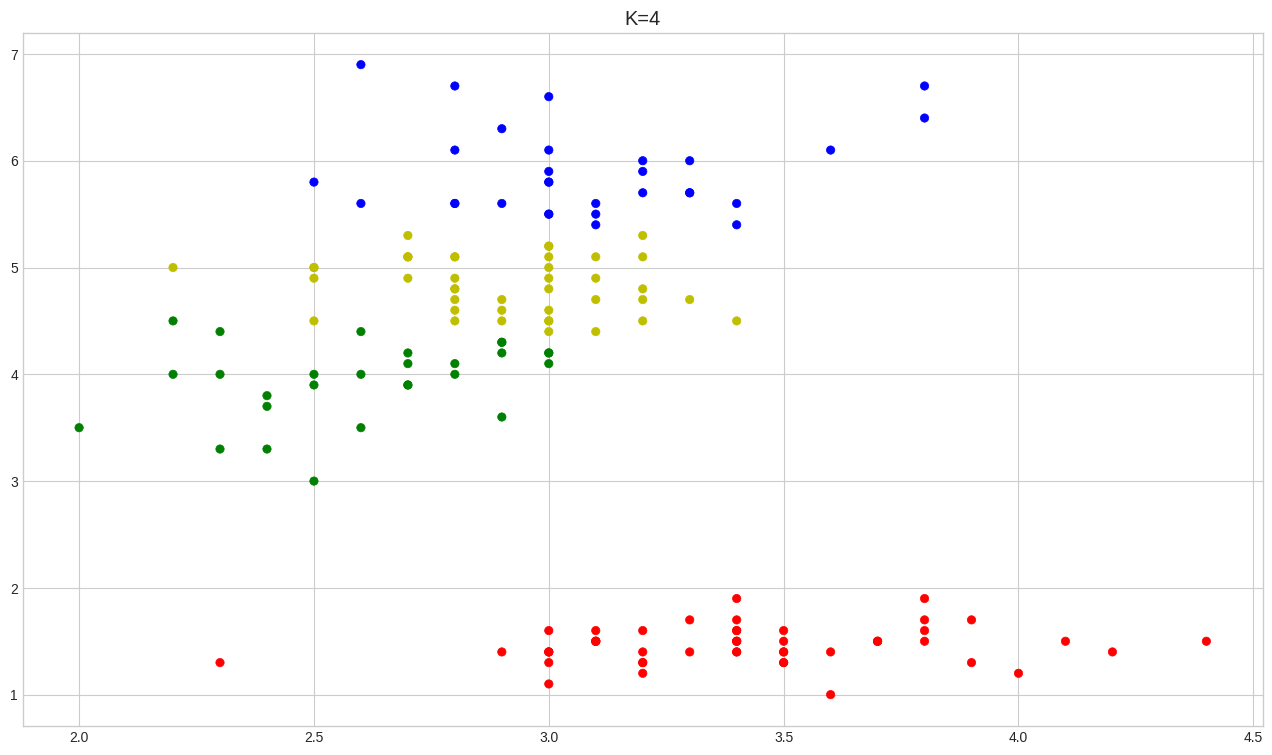

In [92]:
y_pred=KMeans(n_clusters=4).fit_predict(X)
plt.plot
LABEL_COLOR_MAP={0:'r',
                 1:'g',
                 2:'b',
                 3:'y'
}
label_color=[LABEL_COLOR_MAP[l]for l in y_pred]
plt.scatter(f2,f3,c=label_color)
plt.title("K=4")
plt.show()

> berikut merupakan persebaran titik data jika jumlah cluster sebanyak 4 yang ditandai dengan warna merah, biru, kuning, dan hijau.

[[3.08333333 5.90333333]
 [3.418      1.464     ]
 [2.6        3.94285714]
 [2.90238095 4.83571429]]


0.5604747686776623

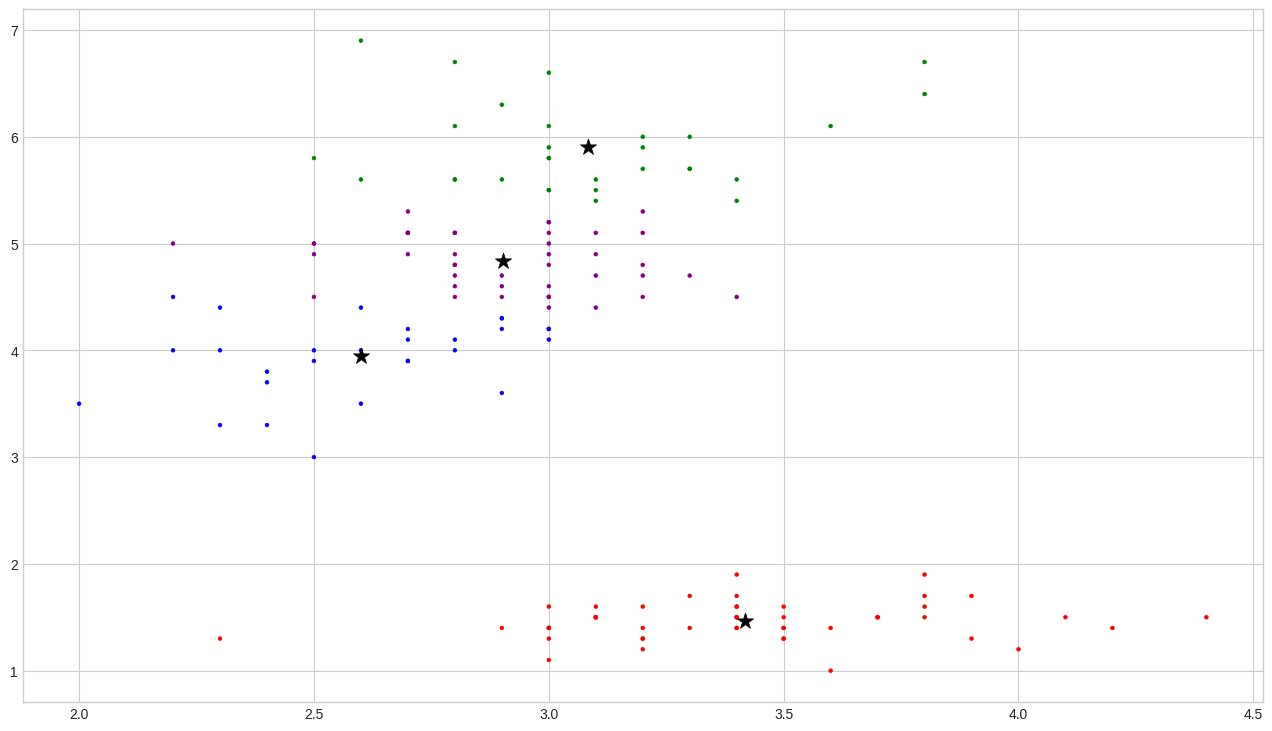

In [104]:
#Melakukan clustering dengan menggunakan K-Means Clustering
# Menentukan jumlah cluster
kmeans= KMeans(n_clusters=4)
#Fitting input data
kmeans=kmeans.fit(X)
#Mendapatkan cluster labels
labels=kmeans.predict(X)

#Mendapatkan nilai centroid
C=kmeans.cluster_centers_

#Mencetak nilai centroid
print(C)

#plot hasil clustering
colors=['green','red','blue','purple']
plt.scatter(X[:,0],X[:,1],s=7,c=[colors[label]for label in labels])
plt.scatter(C[:,0],C[:,1], marker='*',s=150,c='#050505')

from sklearn.metrics.cluster import silhouette_score
silhouette_score(X,labels)

> Dari elbow method, kemudian dilakukan plotting titik data beserta clusternya dengan jumlah cluster=4. Nilai silhouette score jika cluster=4 yaitu 0.56